In [23]:
root_path = '/mnt/storage/fangyijie/fetal_us_planes/'
# lora_path = 'synthetic_lora8/'
# lora 32: synthetic_lora32
# lora 8: synthetic_lora8
sp_train_file = 'spain_train_1150_balanced.csv'
syn_train_file = 'synthetic_train_5000.csv'
# lora_file = 'lora_32.csv'
af_test_file = 'African_test.csv'

### Load Target Labels

In [25]:
import pandas as pd
import random
import os

random.seed(1234)

In [3]:
af_train_df = pd.read_csv(root_path + af_test_file, sep=',')
af_train_df = af_train_df.iloc[:,[1,4]]

syn_train_df = pd.read_csv(root_path + syn_train_file, sep=',')
# syn_train_df = pd.read_csv(root_path + 'synthetic_lora32/' + lora_file, sep=',')
syn_train_df = syn_train_df.iloc[:,[0,1]]

sp_train_df = pd.read_csv(root_path + sp_train_file, sep=',')
sp_train_df = sp_train_df.iloc[:,[2,3]]

In [4]:
print(af_train_df["Plane"].unique())

['Fetal abdomen' 'Fetal femur' 'Fetal brain' 'Fetal thorax']


In [5]:
class2idx = {
    "Other":0,
    "Fetal abdomen":1,
    "Fetal brain":2,
    # "Maternal cervix":3,
    "Fetal femur":4,
    "Fetal thorax":5
}

In [6]:
idx2class = {v: k for k, v in class2idx.items()}

In [7]:
af_train_df["Plane"].replace(class2idx, inplace=True)
syn_train_df["Plane"].replace(class2idx, inplace=True)
sp_train_df["Plane"].replace(class2idx, inplace=True)

In [8]:
# check dataframes
print(af_train_df.head(3))
print(syn_train_df.head(3))
print(sp_train_df.head(3))

   Plane             Image_name
0      1  patient001_DZA_plane0
1      4  patient001_DZA_plane2
2      2  patient001_DZA_plane1
         Image_name  Plane
0  00000-2671683618      1
1  00001-2671683619      1
2  00002-2671683620      1
                     Image_name  Plane
0    Patient01001_Plane1_1_of_1      0
1  Patient00834_Plane1_33_of_34      0
2  Patient00014_Plane1_38_of_42      0


In [9]:
N = 35

In [10]:
sub_af_train_df = af_train_df.groupby('Plane').sample(n=N, random_state=1234)
sub_syn_train_df = syn_train_df.groupby('Plane').sample(n=N, random_state=1234)
sub_sp_train_df = sp_train_df.groupby('Plane').sample(n=N, random_state=1234)

In [11]:
# The African data has no category 'Other'
# Remove 'Other' category from Spanish and synthetic data
sub_syn_train_df = sub_syn_train_df.loc[sub_syn_train_df['Plane'] != 0]
sub_sp_train_df = sub_sp_train_df.loc[sub_sp_train_df['Plane'] != 0]

In [12]:
print(sub_af_train_df.shape)
print(sub_syn_train_df.shape)
print(sub_sp_train_df.shape)

(140, 2)
(140, 2)
(140, 2)


In [13]:
# 1,2,4,5
# "Fetal abdomen":1,
# "Fetal brain":2,
# "Fetal femur":4,
# "Fetal thorax":5
PLANE = 1

In [14]:
sub_af_train_df = sub_af_train_df.loc[sub_af_train_df['Plane'] == PLANE]
sub_syn_train_df = sub_syn_train_df.loc[sub_syn_train_df['Plane'] == PLANE]
sub_sp_train_df = sub_sp_train_df.loc[sub_sp_train_df['Plane'] == PLANE]

In [15]:
# Africa = 1
# Synthesis = 2
# Spain = 3
sub_af_train_df['source'] = 1
sub_syn_train_df['source'] = 2
sub_sp_train_df['source'] = 3

In [16]:
sub_af_train_df = sub_af_train_df.drop(columns=['Plane'])
sub_syn_train_df = sub_syn_train_df.drop(columns=['Plane'])
sub_sp_train_df = sub_sp_train_df.drop(columns=['Plane'])

In [17]:
print(sub_af_train_df.shape)
print(sub_syn_train_df.shape)
print(sub_sp_train_df.shape)

(35, 2)
(35, 2)
(35, 2)


In [18]:
print(sub_af_train_df.head(3))
print(sub_syn_train_df.head(3))
print(sub_sp_train_df.head(3))

                Image_name  source
88   patient024_EGY_plane0       1
131  patient013_MWI_plane0       1
135  patient015_MWI_plane0       1
           Image_name  source
555  00355-2647490729       2
618   00418-379803772       2
676   00476-379803830       2
                     Image_name  source
258  Patient01144_Plane2_1_of_1       3
291  Patient00917_Plane2_1_of_1       3
309  Patient00951_Plane2_1_of_1       3


In [19]:
import shutil
import numpy as np
from PIL import Image

In [20]:
# copy image to the target folder
def copy_img(img_file_path, dst_dir):
    shutil.copy(img_file_path, dst_dir)

In [21]:
# Africa = 1
# Synthesis = 2
# Spain = 3
def get_file_path(in_df, src=0):
    res = []
    cate = ''
    if src == 1:
        cate = 'african_cnn_test/'
    elif src == 2:
        cate = 'synthetic_train_5000/'
    elif src == 3:
        cate = 'Planes_Train/'
    else:
        print('Not a valid category')

    res = [root_path + cate + x + '.png' for x in in_df['Image_name'].tolist()]
    return res

In [22]:
af_imgs = get_file_path(sub_af_train_df, 1)
syn_imgs = get_file_path(sub_syn_train_df, 2)
sp_imgs = get_file_path(sub_sp_train_df, 3)

In [23]:
af_imgs[1]

'/mnt/storage/fangyijie/fetal_us_planes/african_cnn_test/patient013_MWI_plane0.png'

In [ ]:
# /mnt/storage/fangyijie/fetal_us_planes/african_cnn_test/patient013_MWI_plane0.png
# /mnt/storage/fangyijie/fetal_us_planes/radiomics/abdomen

In [24]:
# 1,2,4,5
# "Fetal abdomen":1,
# "Fetal brain":2,
# "Fetal femur":4,
# "Fetal thorax":5

def proc_image_mask(paths, plane):
    for ipath in paths:
        # create a mask
        im = Image.open(ipath)
        im_arr = np.array(im)
        ma_arr = np.uint8(255*np.ones(im_arr.shape))
        ma = Image.fromarray(ma_arr)
        dst_dir = ''

        # save original image
        if plane == 1:
            dst_dir = root_path + 'radiomics/abdomen'
        elif plane == 2:
            dst_dir = root_path + 'radiomics/brain'
        elif plane == 3:
            dst_dir = root_path + 'radiomics/femur'
        elif plane == 4:
            dst_dir = root_path + 'radiomics/thorax'
        else:
            print("Not a valid folder.")
        copy_img(ipath, dst_dir)

        # save mask
        name  = ipath.split('/')[-1]
        ma_path = dst_dir + '/' + name.replace('.png', '_mask.png')
        ma.save(ma_path)
        
        # print(dst_dir)
        # print(name)
        # print(ma_path)

In [25]:
proc_image_mask(af_imgs, 1)

In [36]:
proc_image_mask(syn_imgs, 1)

In [37]:
proc_image_mask(sp_imgs, 1)

### Prepare masks

In [90]:
ab_dir = root_path + 'radiomics/hc_18'

In [91]:
# Define the testcase name
testCase = '714_HC'

# Store the file paths of our testing image and label map into two variables
imagePath = os.path.join(ab_dir, testCase + ".png")
labelPath = os.path.join(ab_dir, testCase + "_mask.png")

### PyRadiomics

Use defaults

In [110]:
import os
import collections
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm
from radiomics import featureextractor  # This module is used for interaction with pyradiomics

In [117]:
# Define the testcase name
testCase = '714_HC'

ab_dir = root_path + 'radiomics/hc18'

# Store the file paths of our testing image and label map into two variables
imagePath = os.path.join(ab_dir, testCase + ".png")
maskPath = os.path.join(ab_dir, testCase + "_mask.png")
savePath = os.path.join(ab_dir, testCase + "_bimask.png")

In [116]:
maskPath

'/mnt/storage/fangyijie/fetal_us_planes/radiomics/hc18/714_HC_mask.png'

In [122]:
mask = Image.open(maskPath)
mask_array = np.asarray(mask, dtype="uint8")
mask_array = np.asarray(mask_array / 255, dtype="uint8")

In [124]:
s_img = Image.fromarray(mask_array)
s_img.save(savePath)

In [123]:
np.max(mask_array)

np.uint8(1)

In [97]:
# Get the testCase
# imagePath, maskPath = radiomics.getTestCase('brain1')

if imagePath is None or maskPath is None:  # Something went wrong, in this case PyRadiomics will also log an error
    raise Exception('Error getting testcase!')  # Raise exception to prevent cells below from running in case of "run all"

In [125]:
print(imagePath)
print(savePath)

/mnt/storage/fangyijie/fetal_us_planes/radiomics/hc18/714_HC.png
/mnt/storage/fangyijie/fetal_us_planes/radiomics/hc18/714_HC_bimask.png


In [103]:
test = sitk.ReadImage(imagePath)
print(test.GetSize())

(800, 540)


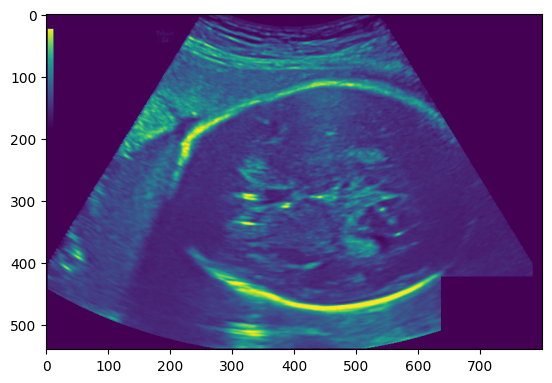

In [104]:
test_array = sitk.GetArrayFromImage(test)
plt.imshow(test_array)

In [105]:
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [126]:
result = extractor.execute(imagePath, savePath)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
/home/fangyijie/miniconda3/envs/rad_user/lib/python3.11/site-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [127]:
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 2.0.0
	 diagnostics_Versions_SimpleITK : 2.3.1
	 diagnostics_Versions_PyWavelet : 1.6.0
	 diagnostics_Versions_Python : 3.11.9
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : 661347843f4056fdbf34785e75366598d07ebb1c
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (1.0, 1.0)
	 diagnostics_Image-original_Size : (800, 540)
	 diagnostics_Image-original_Mean : 39.46100462962963
	 diagnostics_I

Extract features

### Image Features

### Start Visualization